In [16]:
import pandas as pd
import pickle
from pandas_profiling import ProfileReport
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
df = pd.read_csv("loan_prediction.csv")

In [18]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [19]:
df.drop(labels='Loan_ID', axis=1, inplace=True)

In [20]:
df.shape

(614, 12)

In [21]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [22]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']

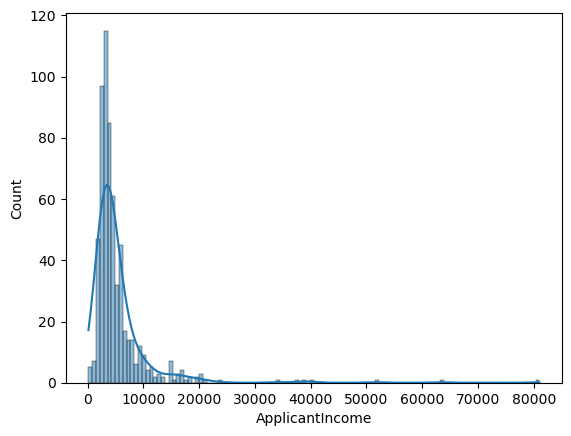

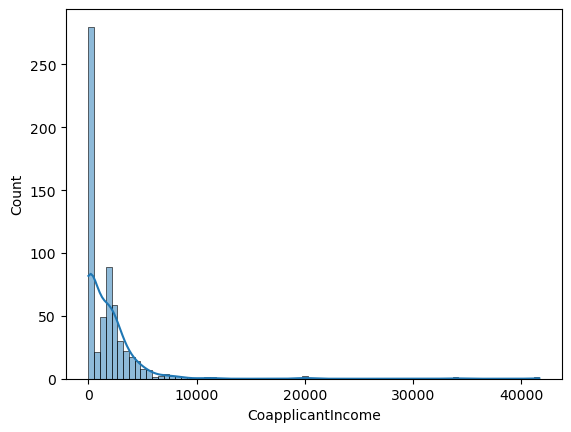

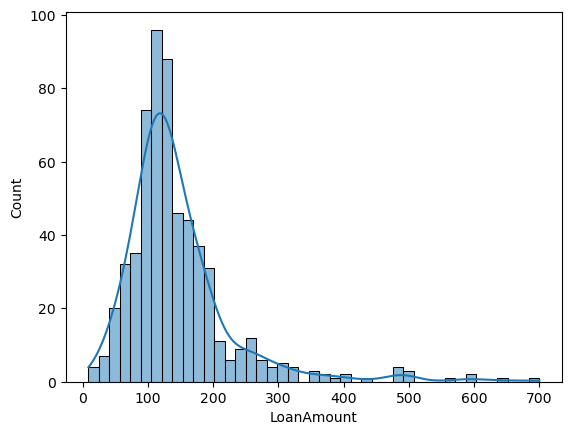

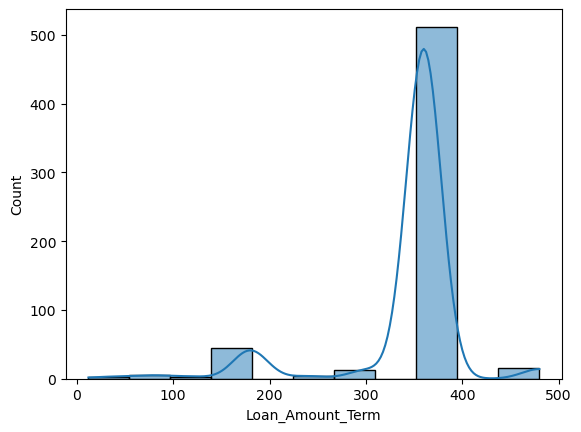

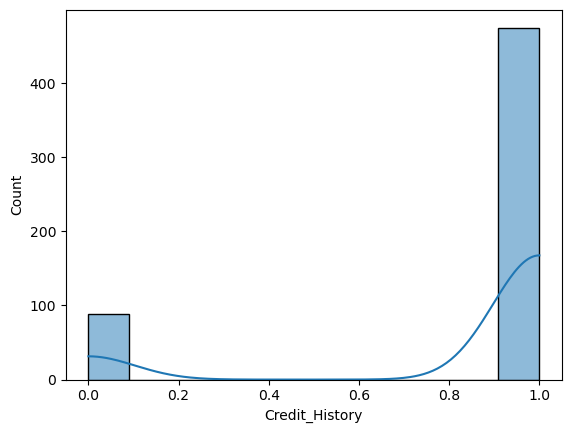

In [24]:
for i in numerical_features:
    sns.histplot(data=df , x=i ,kde=True )
    plt.show()

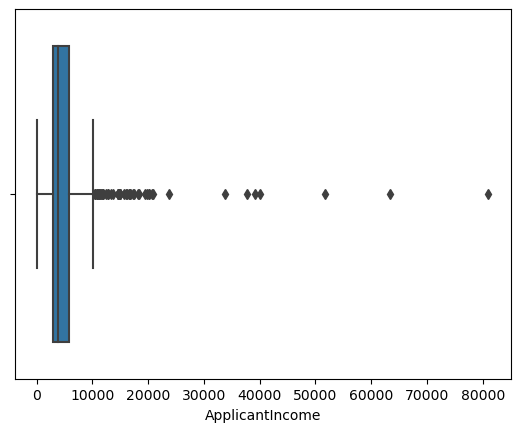

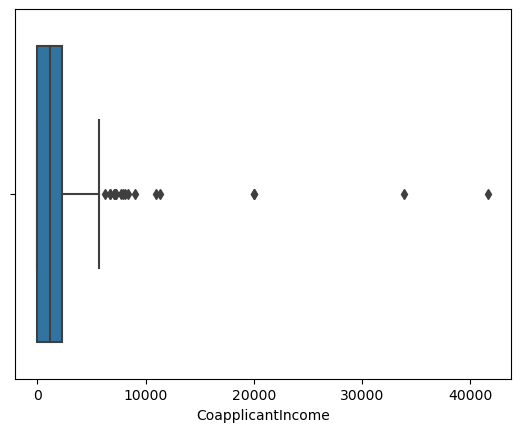

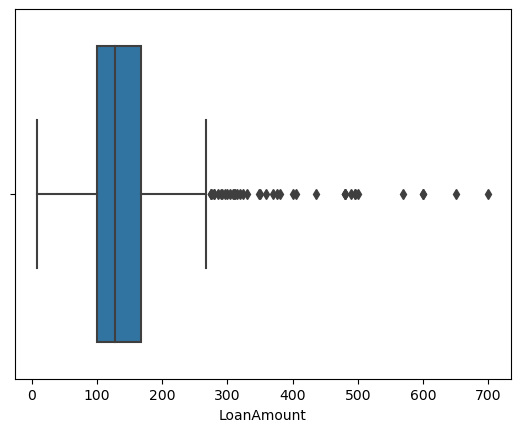

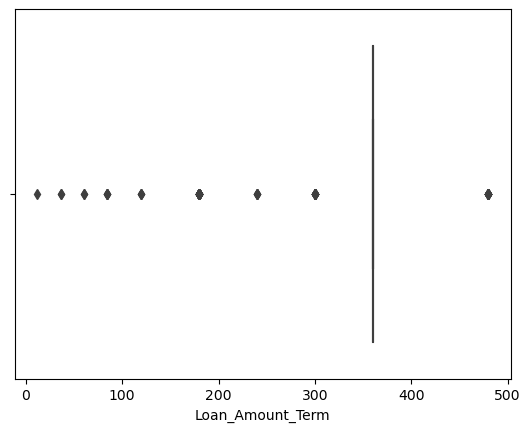

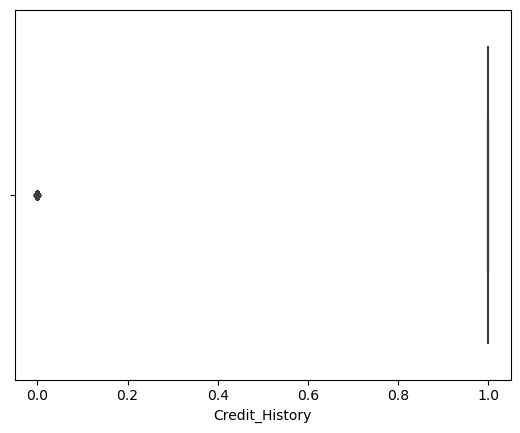

In [25]:
for column in numerical_features:
    
    sns.boxplot(x=df[column], data=df)
    plt.xlabel(column,fontsize=10)
    plt.show()

In [26]:
categorical_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [27]:
numerical_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

<AxesSubplot:>

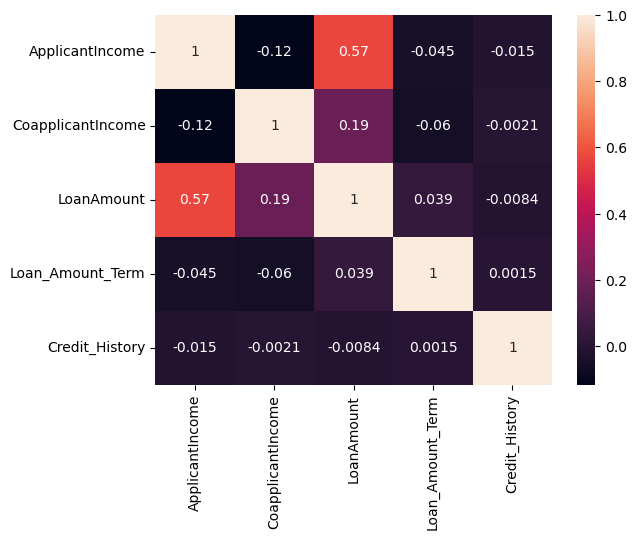

In [28]:
sns.heatmap(df.corr(), annot=True)

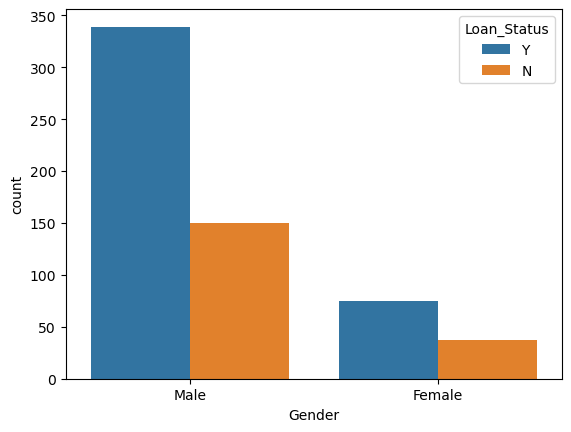

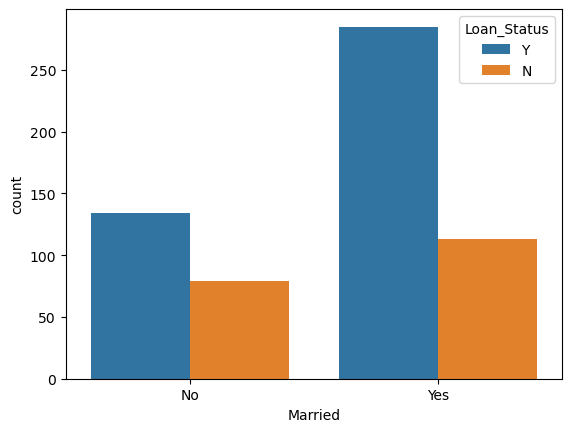

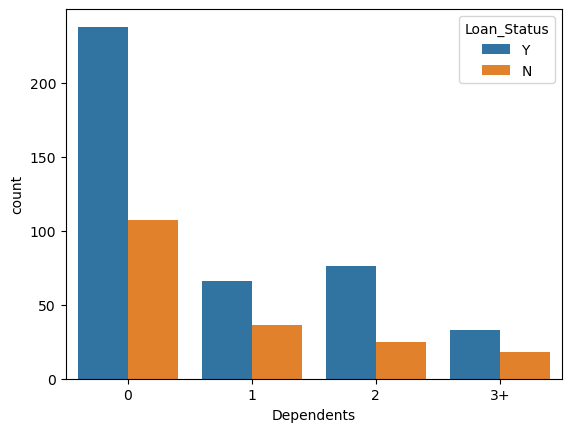

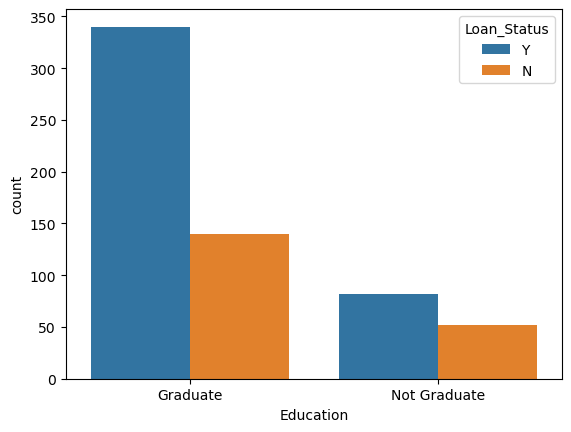

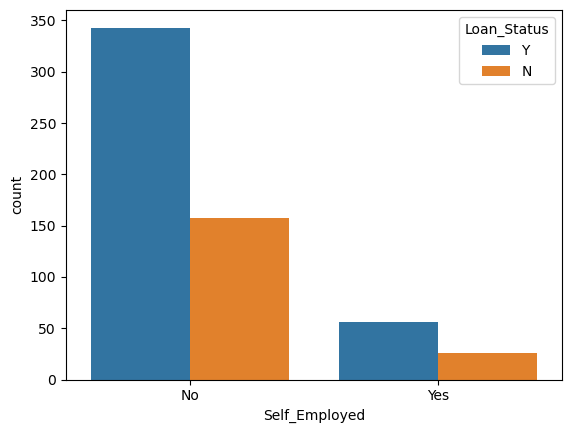

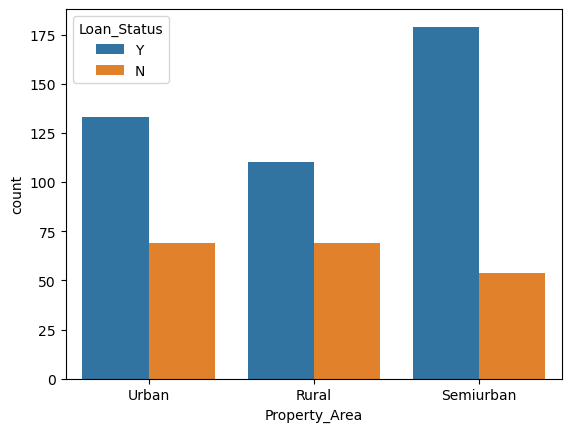

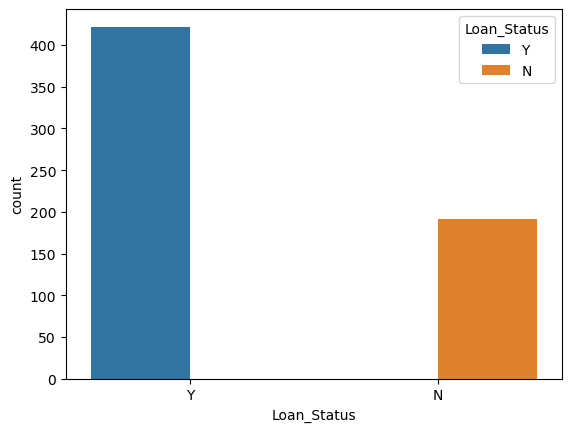

In [29]:
for i in categorical_features:
    
    sns.countplot(data=df , x=i , hue='Loan_Status' )
    plt.show()

In [30]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()  
df['Loan_Status']=labelencoder.fit_transform(df['Loan_Status'])
df['Loan_Status']=df['Loan_Status'].astype('int')

In [31]:
## now we will handle missing values using SIMPLE IMPUTER
## automate the whole process using pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler ##feature scaling
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [32]:
X = df.drop(labels=['Loan_Status'],axis=1)
Y = df.Loan_Status

In [33]:
categorical_cols = X.select_dtypes(include='object').columns
print(categorical_cols)
numerical_cols = X.select_dtypes(exclude='object').columns
print(numerical_cols)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')
Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


In [34]:
num_pipeline= Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
    ]
)

##Categorical Pipeline

cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('enc', OneHotEncoder(sparse = False, drop ='first')),
    ('scaler',StandardScaler())
     ]

)


preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])

In [35]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)

X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

C:\Users\user\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [36]:
X_train.shape

(429, 14)

In [37]:
y_train.shape

(429,)

In [38]:
X_train

,num_pipeline__ApplicantIncome,num_pipeline__CoapplicantIncome,num_pipeline__LoanAmount,num_pipeline__Loan_Amount_Term,num_pipeline__Credit_History,cat_pipeline__Gender_Male,cat_pipeline__Married_Yes,cat_pipeline__Dependents_1,cat_pipeline__Dependents_2,cat_pipeline__Dependents_3+,cat_pipeline__Education_Not Graduate,cat_pipeline__Self_Employed_Yes,cat_pipeline__Property_Area_Semiurban,cat_pipeline__Property_Area_Urban
0,-0.649376,10.229235,-0.624387,0.290885,0.430213,0.493435,-1.406829,-0.434011,-0.437798,-0.288675,-0.536925,-0.399324,-0.786682,1.483743
1,-0.680639,0.718413,0.655044,0.290885,-2.324432,0.493435,0.710819,-0.434011,-0.437798,-0.288675,1.862458,-0.399324,1.271162,-0.673971
2,-0.497338,-0.040624,-0.359280,-2.498754,-2.324432,0.493435,0.710819,2.304088,-0.437798,-0.288675,1.862458,-0.399324,-0.786682,-0.673971
3,-0.275330,-0.517007,-0.382333,0.290885,0.430213,-2.026609,-1.406829,-0.434011,-0.437798,-0.288675,-0.536925,-0.399324,1.271162,-0.673971
4,0.553525,-0.517007,0.090250,-0.638994,-2.324432,0.493435,0.710819,2.304088,-0.437798,-0.288675,-0.536925,-0.399324,1.271162,-0.673971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,0.613819,-0.517007,0.067197,0.290885,0.430213,-2.026609,-1.406829,2.304088,-0.437798,-0.288675,-0.536925,2.504234,1.271162,-0.673971
425,-0.557446,0.907695,-0.509123,0.290885,0.430213,-2.026609,0.710819,-0.434011,-0.437798,-0.288675,-0.536925,-0.399324,1.271162,-0.673971
426,-0.052764,0.144530,0.470621,0.290885,0.430213,0.493435,0.710819,-0.434011,2.284161,-0.288675,-0.536925,-0.399324,-0.786682,-0.673971
427,-0.871011,0.652672,-0.359280,2.150645,0.430213,-2.026609,-1.406829,-0.434011,-0.437798,-0.288675,-0.536925,-0.399324,-0.786682,-0.673971


In [39]:
y_train.shape

(429,)

In [40]:
y_train

581    0
250    0
471    0
80     1
408    0
      ..
430    1
145    1
140    0
500    1
421    0
Name: Loan_Status, Length: 429, dtype: int32

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn import tree

In [42]:
df_random= RandomForestClassifier(n_estimators=15, criterion='gini',
                                  max_depth=3, min_samples_split=2, min_samples_leaf=15,
                                  oob_score=False,
                                  random_state=144, verbose=1, ccp_alpha=0.0,
                                  max_samples=None)
df_random.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished


RandomForestClassifier(max_depth=3, min_samples_leaf=15, n_estimators=15,
                       random_state=144, verbose=1)

In [43]:
df_random.estimators_

[DecisionTreeClassifier(max_depth=3, max_features='sqrt', min_samples_leaf=15,
                        random_state=400909671),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', min_samples_leaf=15,
                        random_state=1650886076),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', min_samples_leaf=15,
                        random_state=1679087482),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', min_samples_leaf=15,
                        random_state=182426840),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', min_samples_leaf=15,
                        random_state=2047559078),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', min_samples_leaf=15,
                        random_state=308582374),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', min_samples_leaf=15,
                        random_state=745270915),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', min_samples_leaf=15,
                      

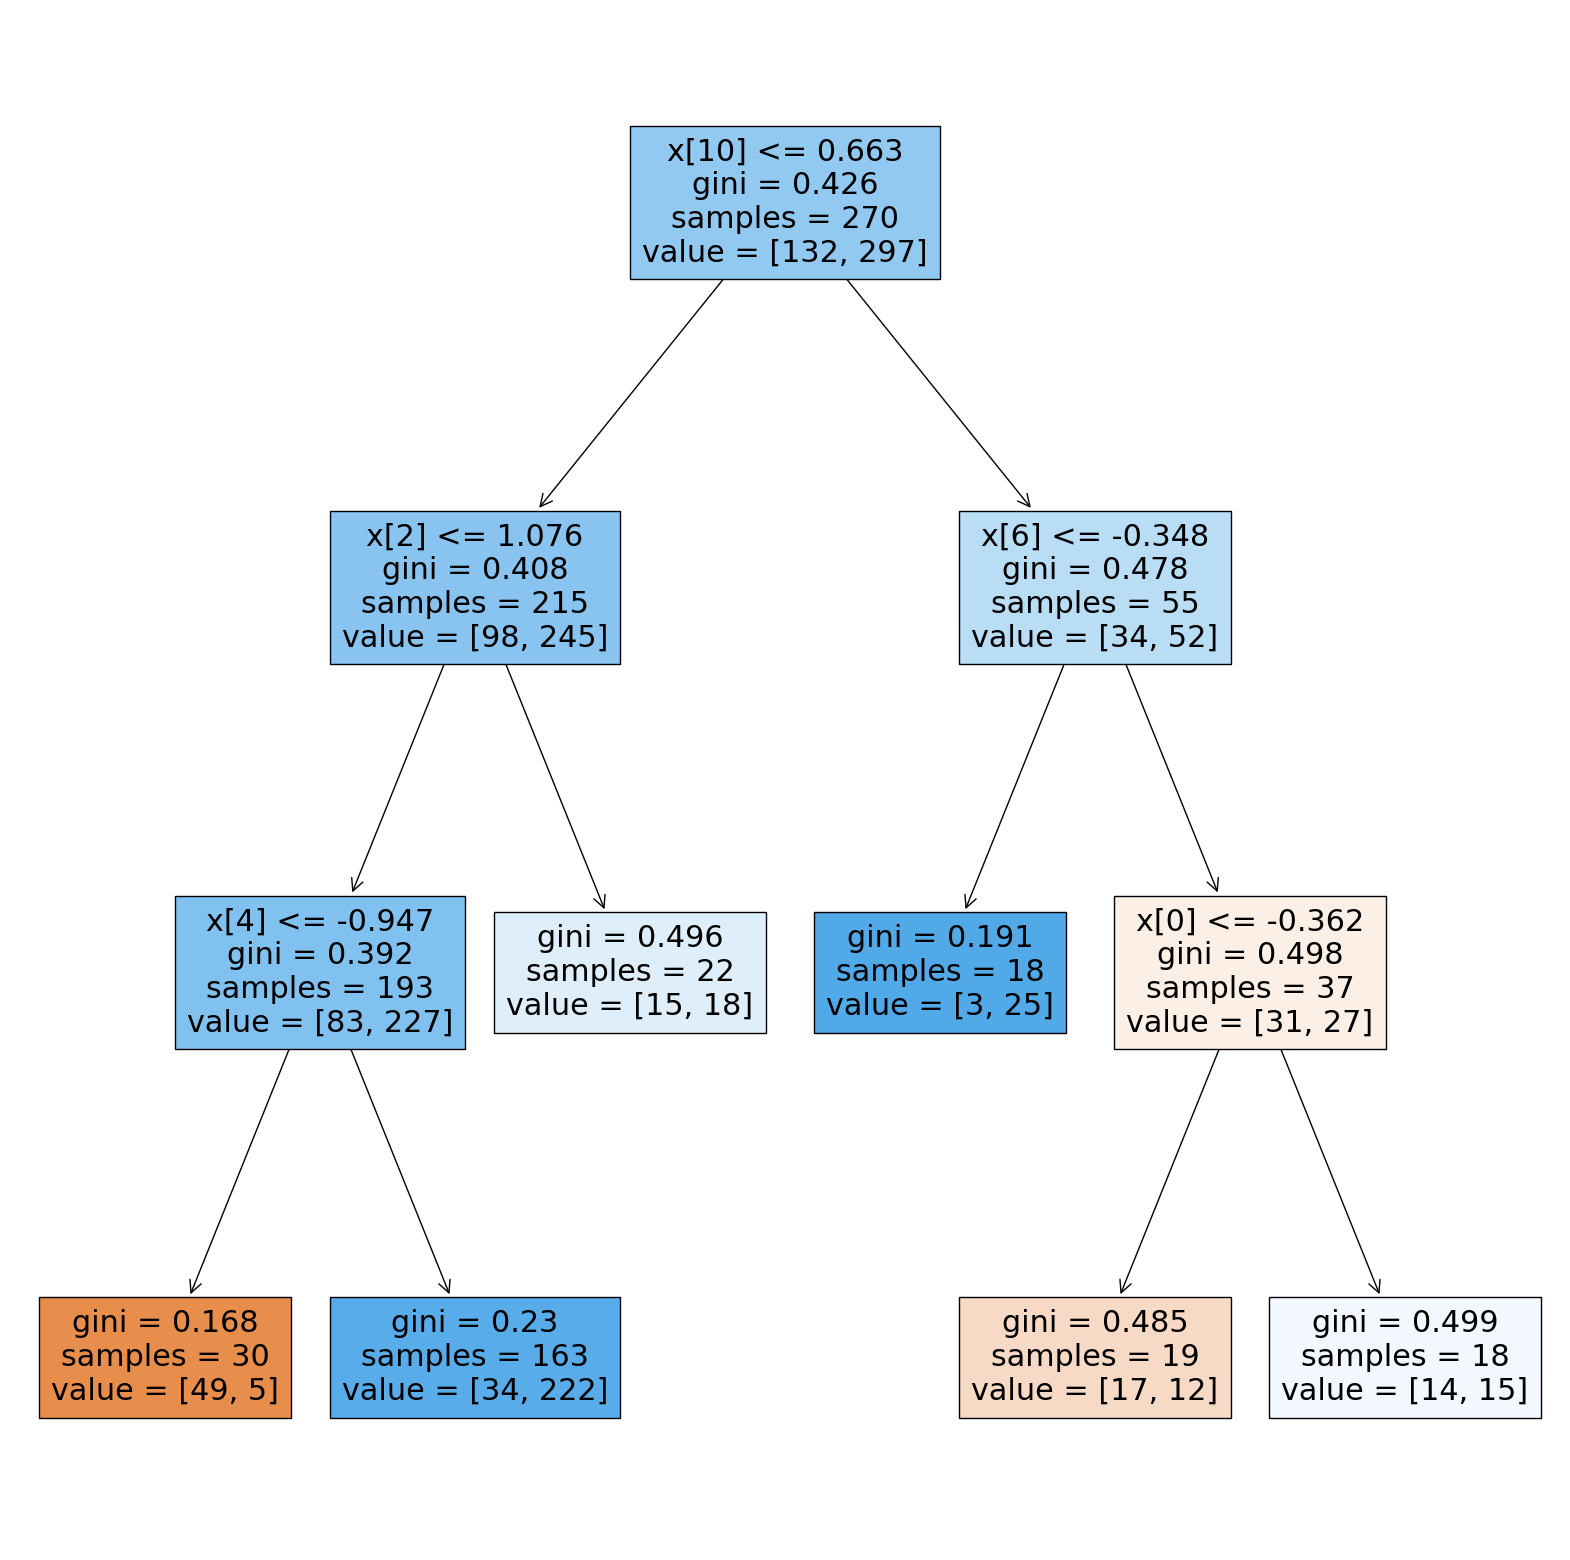

In [44]:
plt.figure(figsize= (20,20))
for i in df_random.estimators_:
    tree.plot_tree(i,filled=True)

In [45]:
y_pred_train = df_random.predict(X_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished


In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(y_train,y_pred_train)

0.8135198135198135

In [49]:
y_pred = df_random.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished


In [50]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.8

In [51]:
grid_param={
    'n_estimators':[5,10,15,20,25],
    'criterion':['gini', 'entropy'],
    'max_depth':range(8),
    'min_samples_leaf':range(30),
    'oob_score':[True, False],
    'ccp_alpha':[0,0.1,0.2,1,2]
}
grid_search = GridSearchCV(param_grid= grid_param , estimator= df_random, cv=10 , n_jobs=10, verbose=1)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 24000 candidates, totalling 240000 fits


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
37000 fits failed out of a total of 240000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\user\anaconda3\lib\site-pa

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=3, min_samples_leaf=15,
                                              n_estimators=15, random_state=144,
                                              verbose=1),
             n_jobs=10,
             param_grid={'ccp_alpha': [0, 0.1, 0.2, 1, 2],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 8),
                         'min_samples_leaf': range(0, 30),
                         'n_estimators': [5, 10, 15, 20, 25],
                         'oob_score': [True, False]},
             verbose=1)

In [52]:
grid_search.best_params_

{'ccp_alpha': 0,
 'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'n_estimators': 15,
 'oob_score': True}

In [58]:
df_best = RandomForestClassifier(ccp_alpha=0 , criterion= 'gini',
 max_depth=5,
 min_samples_leaf=30,
 n_estimators=15, oob_score= True)

In [59]:
df_best.fit(X_train,y_train)
y_pred = df_best.predict(X_test)

In [60]:
accuracy_score(y_test,y_pred)

0.8

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(X_train, y_train)  

In [ ]:
classifier.score(X_train,y_train)

In [ ]:
y_pred_dt = classifier.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred_dt)